In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Get familiar with NumPy arrays

In [ ]:
my_2d_array = np.array([[1,2,3,4], [5,6,7,8]], dtype=np.int64)

print('Print out memory address', my_2d_array.data)

print('Print out the shape', my_2d_array.shape)

print('Print out the data type', my_2d_array.dtype)

print('Print out the stride', my_2d_array.strides)

print('Value:', my_2d_array)

Print out memory address <memory at 0x7d05cb8a5a40>
Print out the shape (2, 4)
Print out the data type int64
Print out the stride (32, 8)
Value: [[1 2 3 4]
 [5 6 7 8]]


In [ ]:
a1D = np.array([1, 2, 3, 4])
a1D.shape

(4,)

In [ ]:
a2D = np.array([[1, 2], [3, 4]])
a2D.shape

(2, 2)

In [ ]:
a3D = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
a3D.shape

(2, 2, 2)

In [ ]:
x = np.array([[1, 2, 3], [3, 4, 5]])
y = np.array([6,7,8])

z = np.add(x,y)
print("Addition of x and y:\n", z)

z = np.subtract(x,y)
print("Subtraction of y from x:\n", z)

z = np.multiply(x,y)
print("Element-wise multiplication of x and y:\n", z)

Addition of x and y:
 [[ 7  9 11]
 [ 9 11 13]]
Subtraction of y from x:
 [[-5 -5 -5]
 [-3 -3 -3]]
Element-wise multiplication of x and y:
 [[ 6 14 24]
 [18 28 40]]


1. Generate a large tabular dataset with 10 features, 1 regression target, 150 000 rows

In [ ]:
X, y = make_friedman1(n_samples=150000, n_features=10, noise=0.1, random_state=42)

In [ ]:
print(X.shape, y.shape)

(150000, 10) (150000,)


In [ ]:
print(np.min(y), np.max(y))

0.4468992698571736 29.319258218229482


In [ ]:
# normalize
#mins = np.min(y)
#maxs = np.max(y)

#y = (y-mins) / (maxs-mins)

In [ ]:
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df['Target'] = y

df

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,16.780902
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,6.035533
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,9.558548
3,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,21.368417
4,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,16.661503
...,...,...,...,...,...,...,...,...,...,...,...
149995,0.987278,0.314372,0.116298,0.554110,0.424823,0.206305,0.762729,0.407317,0.398890,0.628976,18.971804
149996,0.742040,0.454794,0.329171,0.420976,0.237484,0.313892,0.668228,0.316229,0.335833,0.044787,14.743121
149997,0.325532,0.620385,0.390060,0.129098,0.142193,0.221095,0.268873,0.453143,0.422158,0.241092,8.032582
149998,0.633519,0.715088,0.604779,0.060219,0.306163,0.025210,0.574980,0.690103,0.438181,0.096789,12.165681


In [ ]:
print(np.min(X), np.max(X))

5.058923464584808e-07 0.9999983148609545


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120000, 10) (120000,)
(30000, 10) (30000,)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(lr_model.score(X_train, y_train), lr_model.score(X_test, y_test))

0.7517117522355918 0.7509929695290911


In [ ]:
y_pred = lr_model.predict(X_test)
df = pd.DataFrame({ 'True Labels': y_test, 'Predicted Labels': y_pred})
df.head()

,True Labels,Predicted Labels
0,12.194388,21.203546
1,10.614022,13.382760
2,8.823665,9.879075
3,11.175318,13.121517
4,15.056409,17.029144


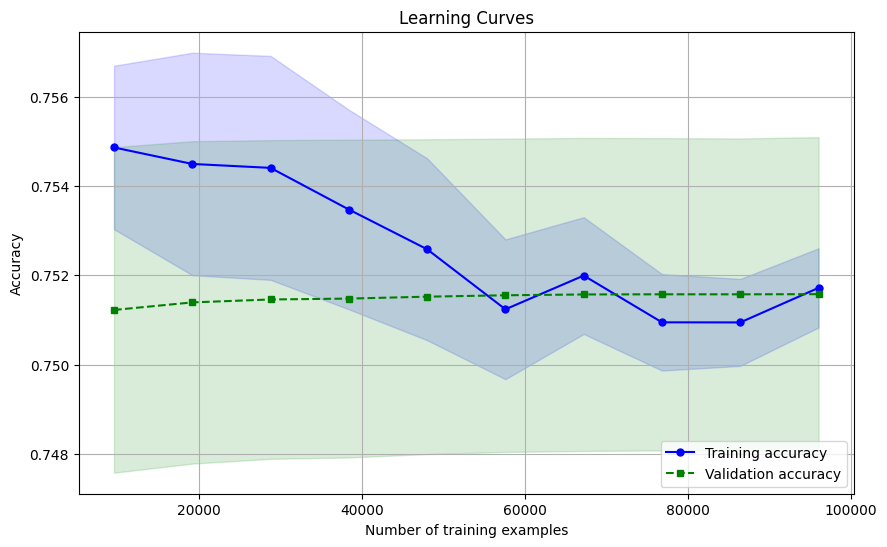

Train
R2: 0.7517117522355918
MAPE: 0.15505650127213072
MSE: 5.91693067876842

Test
R2: 0.7509929695290911
MAPE: 0.154614695591876
MSE: 5.919955772004187


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title('Learning Curves')
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


lr_model.fit(X_train, y_train)
plot_learning_curves(lr_model, X_train, y_train, X_test, y_test)

y_train_pred = lr_model.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
mape = mean_absolute_percentage_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)

print('Train')
print(f'R2: {r2}')
print(f'MAPE: {mape}')
print(f'MSE: {mse}')

y_test_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print()
print('Test')
print(f'R2: {r2}')
print(f'MAPE: {mape}')
print(f'MSE: {mse}')

Реалізуємо вручну ітеративну лінійну регресію

In [ ]:
def linear_regression_with_epochs(X_train, y_train, X_test, y_test, learning_rate, epochs):
    y_train = np.reshape(y_train, (-1, 1))
    y_test = np.reshape(y_test, (-1, 1))

    n_features = X_train.shape[1]

    weights = np.zeros((n_features, 1))
    bias = 0

    train_r2_scores = []
    test_r2_scores = []
    train_mse = []
    test_mse = []
    train_mape = []
    test_mape = []

    for epoch in range(epochs):
        y_pred_train = np.dot(X_train, weights) + bias
        y_pred_test = np.dot(X_test, weights) + bias

        mse_train = np.mean((y_train - y_pred_train) ** 2)
        train_mse.append(mse_train)
        mse_test = np.mean((y_test - y_pred_test) ** 2)
        test_mse.append(mse_test)

        r2_train = 1 - (np.sum((y_train - y_pred_train) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))
        train_r2_scores.append(r2_train)
        r2_test = 1 - (np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
        test_r2_scores.append(r2_test)

        mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
        train_mape.append(mape_train)
        mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
        test_mape.append(mape_test)

        # Обчислюємо градієнти
        dw = -(2 / len(X_train)) * np.dot(X_train.T, (y_train - y_pred_train))
        db = -(2 / len(X_train)) * np.sum(y_train - y_pred_train)

        # Оновлюємо параметри
        weights -= learning_rate * dw
        bias -= learning_rate * db

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(range(epochs), train_r2_scores, label='Train', linewidth=3)
    plt.plot(range(epochs), test_r2_scores, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('R2 Score')
    plt.title('R2 Score History')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(range(epochs), train_mse, label='Train', linewidth=3)
    plt.plot(range(epochs), test_mse, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('MSE History')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(range(epochs), train_mape, label='Train', linewidth=3)
    plt.plot(range(epochs), test_mape, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('MAPE (%)')
    plt.title('MAPE History')
    plt.legend()

    plt.show()

    print("Train MSE:", train_mse[-1])
    print("Test MSE:", test_mse[-1])

    print("Train R2 Score:", train_r2_scores[-1])
    print("Test R2 Score:", test_r2_scores[-1])

    print("Train MAPE:", train_mape[-1])
    print("Test MAPE:", test_mape[-1])


    return weights, bias

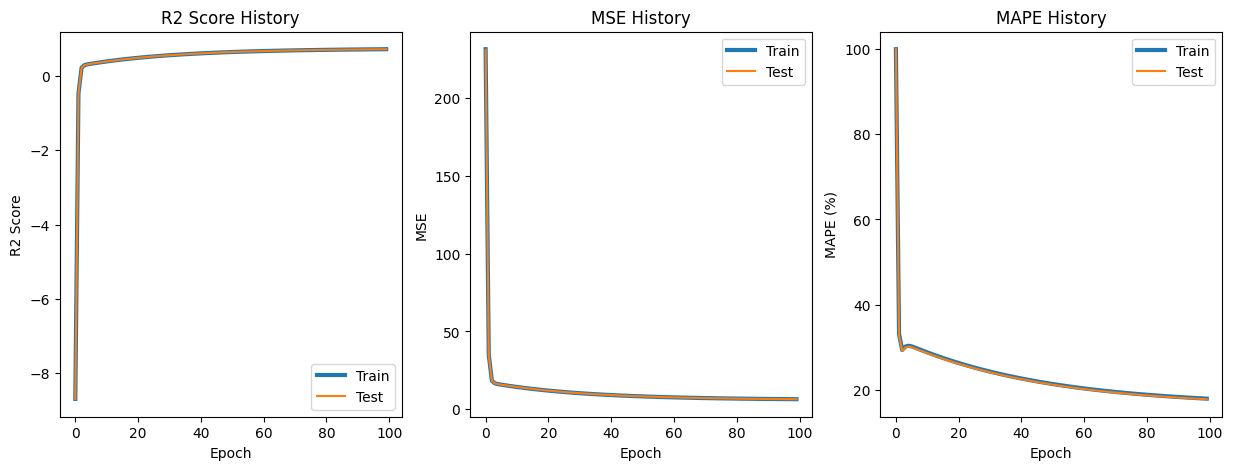

Train MSE: 6.514908906842294
Test MSE: 6.502218007310312
Train R2 Score: 0.7266191874397117
Test R2 Score: 0.7265016733517471
Train MAPE: 17.89835373130049
Test MAPE: 17.759401197425035
[[5.54749763]
 [5.50750201]
 [0.05161709]
 [8.18047393]
 [4.12449916]
 [0.06805788]
 [0.05481305]
 [0.02860216]
 [0.06871181]
 [0.06587266]] 2.614520623858856


In [ ]:
coefficients, bias = linear_regression_with_epochs(X_train, y_train, X_test, y_test, learning_rate=0.1, epochs=100)

print(coefficients, bias)

Як можна помітити, точність після 100 епох виявилася нижчою, ніж у вбудованої моделі LinearRegression. Однак, якщо збільшити кількість епох, ця різниця буде зменшуватись.

2. Fit target with all combinations of DNNs

In [ ]:
!pip install torchmetrics
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam, RMSprop, SGD
from torchmetrics.regression import MeanAbsolutePercentageError, R2Score

In [ ]:
class DenseNeuralNetwork(nn.Module):
    def __init__(self, num_layer, input_size, hidden_sizes, output_size):
        super(DenseNeuralNetwork, self).__init__()

        layers = []
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        for i in range(len(hidden_sizes)):
            if i == 0:
              layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i]))
              layers.append(nn.ReLU())
            else:
              layers.append(nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))
              layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_sizes[i], output_size))
        self.linear_relu_stack = nn.Sequential(*layers)
        #self.linear_relu_stack.apply(weights_init)

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits


def train(train_dataloader, model, loss_function, optimizer, X_train_value, y_train_value):
    epoch_loss = 0
    r2 = 0
    mape = 0
    mean_abs_percentage_error = MeanAbsolutePercentageError()
    r2score = R2Score()
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = loss_function(outputs.squeeze(), labels)
        r2 += r2score(outputs.squeeze(), labels).item()
        mape += mean_abs_percentage_error(outputs.squeeze(), labels).item()

        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    loss = 0
    r2 /= (i + 1)
    mape /= (i + 1)
    with torch.no_grad():
        for i, data in enumerate(train_dataloader):
            inputs, labels = data
            pred = model(inputs)
            loss += loss_function(pred.squeeze(), labels).item()
        loss /= (i + 1)
    #print("MSE Train: {:.4f}, R2 Train: {:.4f}, MAPE Train: {:.4f}".format(mse, r2, mape))

    return loss, r2, mape, model


def test(test_dataloader, X_test_value, y_test_value, model, loss_function):
    test_loss = 0
    r2 = 0
    mape = 0
    num_batches = len(test_dataloader)
    mean_abs_percentage_error = MeanAbsolutePercentageError()
    r2score = R2Score()
    with torch.no_grad():
        for i, data in enumerate(test_dataloader):
            inputs, labels = data
            pred = model(inputs)
            test_loss += loss_function(pred.squeeze(), labels).item()
            r2 += r2score(pred.squeeze(), labels).item()
            mape += mean_abs_percentage_error(pred.squeeze(), labels).item()

        test_loss /= num_batches
        r2 /= num_batches
        mape /= num_batches
        mse = test_loss
        #print("MSE Test: {:.4f}, R2 Test: {:.4f}, MAPE Test: {:.4f}".format(mse, r2, mape))

    return mse, r2, mape


def plot_learning_curves(train_losses, test_losses, train_r2_scores, test_r2_scores, train_mapes, test_mapes, title):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='Train MSE')
    plt.plot(epochs, test_losses, label='Test MSE')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title('MSE')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_r2_scores, label='Train R2 Score')
    plt.plot(epochs, test_r2_scores, label='Test R2 Score')
    plt.xlabel('Epochs')
    plt.ylabel('R2 Score')
    plt.title('R2 Score')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(epochs, train_mapes, label='Train MAPE')
    plt.plot(epochs, test_mapes, label='Test MAPE')
    plt.xlabel('Epochs')
    plt.ylabel('MAPE')
    plt.title('MAPE')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()


def weights_init(m):
  if isinstance(m, nn.Linear):
    #torch.nn.init.xavier_uniform_(m.weight)
    m.weight.data.fill_(0.01)
    #torch.nn.init.constant_(m.bias, 0)
    m.bias.data.fill_(0.01)

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=1e-9, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = np.Inf
        self.early_stop = False
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, loss, model):

        if self.best_loss - self.delta < loss:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')

            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.save_checkpoint(loss, model)

            self.best_loss = loss
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.best_loss:.6f} --> {val_loss:.6f}).  Saving model ...')

        torch.save(model.state_dict(), self.path)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
#input_size = 10
#hidden_sizes = 128
#output_size = 1
#num_layer = 1
#model = DenseNeuralNetwork(num_layer, input_size, hidden_sizes, output_size)
#model

Using cpu device


In [ ]:
def start(X_train_input, y_train_input, X_test_input, y_test_input, hidden_sizes, input_size, output_size, num_layer):
    X_train_tensor = torch.Tensor(X_train_input)
    y_train_tensor = torch.Tensor(y_train_input)
    X_test_tensor = torch.Tensor(X_test_input)
    y_test_tensor = torch.Tensor(y_test_input)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_dataloader_1 = DataLoader(train_dataset, batch_size=64)

    test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)
    test_dataloader_1 = DataLoader(test_dataset, batch_size=64)
    optimizers = ['SGD', 'RMSProp', 'Adam']
    learning_rates = [0.1, 0.01, 0.001]
    for optim in optimizers:
        for lr in learning_rates:
            model = DenseNeuralNetwork(num_layer, input_size, hidden_sizes, output_size)
            print(model)

            if optim == 'SGD':
                optimizer = SGD(model.parameters(), lr=lr)
            elif optim == 'RMSProp':
                optimizer = RMSprop(model.parameters(), lr=lr)
            elif optim == 'Adam':
                optimizer = Adam(model.parameters(), lr=lr)

            train_mse_values= []
            test_mse_values = []

            train_r2_scores_values = []
            test_r2_scores_values = []

            train_mapes_values = []
            test_mapes_values = []

            early_stop = EarlyStopping(verbose=False)
            epochs = 50
            loss_fn = torch.nn.MSELoss()
            title = f'DNN {num_layer} hidden layer, {optim}, LR = {lr}'
            print(title)
            for epoch in range(epochs):
                print("Epoch", epoch + 1)
                train_mse, train_r2, train_mape, model = train(train_dataloader_1, model, loss_fn, optimizer, X_train_tensor, y_train_tensor)

                print("MSE Train: {:.4f}, R2 Train: {:.4f}, MAPE Train: {:.4f}".format(train_mse, train_r2, train_mape))
                train_mse_values.append(train_mse)
                train_r2_scores_values.append(train_r2)
                train_mapes_values.append(train_mape)

                test_mse, test_r2, test_mape = test(test_dataloader_1, X_test_tensor, y_test_tensor, model, loss_fn)

                print("MSE Test: {:.4f}, R2 Test: {:.4f}, MAPE Test: {:.4f}".format(test_mse, test_r2, test_mape))
                early_stop(test_mse, model)
                test_mse_values.append(test_mse)
                test_r2_scores_values.append(test_r2)
                test_mapes_values.append(test_mape)
                if early_stop.early_stop:
                    break
            plot_learning_curves(train_mse_values, test_mse_values, train_r2_scores_values, test_r2_scores_values, train_mapes_values, test_mapes_values, title)


DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 1 hidden layer, SGD, LR = 0.1
Epoch 1
MSE Train: 23.8566, R2 Train: -0.2513, MAPE Train: 0.3863
MSE Test: 23.7957, R2 Test: -0.0174, MAPE Test: 0.3719
Epoch 2
MSE Train: 23.8566, R2 Train: -0.0188, MAPE Train: 0.3788
MSE Test: 23.7957, R2 Test: -0.0174, MAPE Test: 0.3719
EarlyStopping counter: 1 out of 5
Epoch 3
MSE Train: 23.8566, R2 Train: -0.0188, MAPE Train: 0.3788
MSE Test: 23.7957, R2 Test: -0.0174, MAPE Test: 0.3719
EarlyStopping counter: 2 out of 5
Epoch 4
MSE Train: 23.8566, R2 Train: -0.0188, MAPE Train: 0.3788
MSE Test: 23.7957, R2 Test: -0.0174, MAPE Test: 0.3719
EarlyStopping counter: 3 out of 5
Epoch 5
MSE Train: 23.8566, R2 Train: -0.0188, MAPE Train: 0.3788
MSE Test: 23.7957, R2 Test: -0.0174, MAPE 

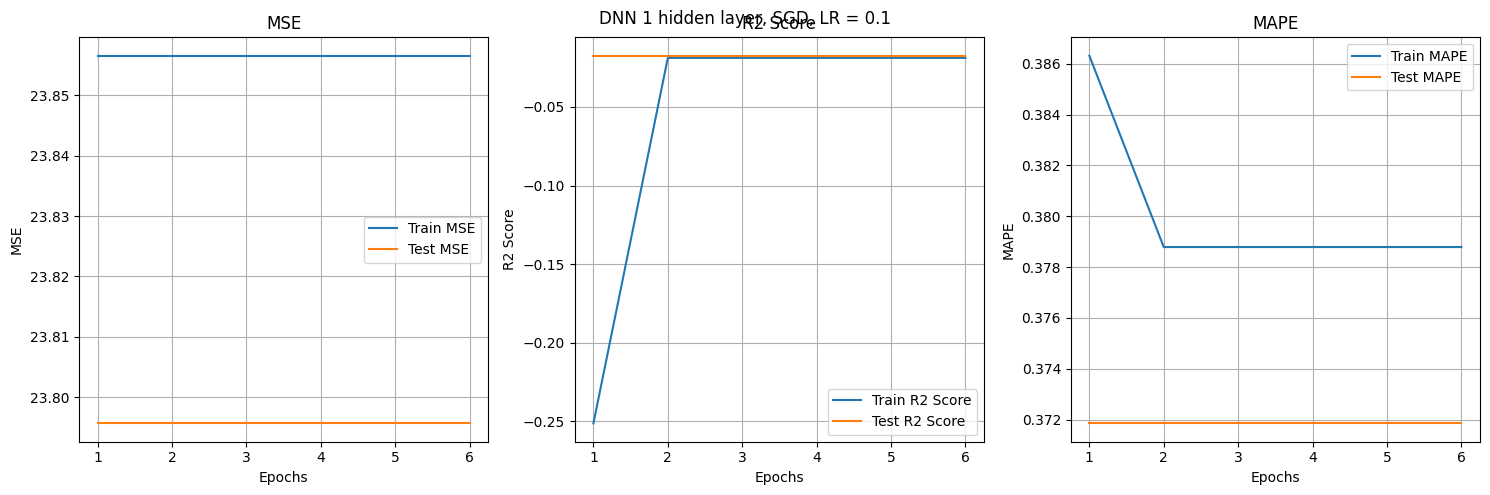

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 1 hidden layer, SGD, LR = 0.01
Epoch 1
MSE Train: 3.7089, R2 Train: 0.6384, MAPE Train: 0.1801
MSE Test: 3.6879, R2 Test: 0.8393, MAPE Test: 0.1272
Epoch 2
MSE Train: 1.1832, R2 Train: 0.8792, MAPE Train: 0.1037
MSE Test: 1.2034, R2 Test: 0.9475, MAPE Test: 0.0625
Epoch 3
MSE Train: 0.7222, R2 Train: 0.9287, MAPE Train: 0.0773
MSE Test: 0.7348, R2 Test: 0.9678, MAPE Test: 0.0520
Epoch 4
MSE Train: 0.4689, R2 Train: 0.9593, MAPE Train: 0.0605
MSE Test: 0.4712, R2 Test: 0.9793, MAPE Test: 0.0437
Epoch 5
MSE Train: 0.3811, R2 Train: 0.9718, MAPE Train: 0.0507
MSE Test: 0.3803, R2 Test: 0.9833, MAPE Test: 0.0390
Epoch 6
MSE Train: 0.3521, R2 Train: 0.9759, MAPE Train: 0.0467
MSE Test: 0.3497, R2 Test: 0.9846, MAPE Test

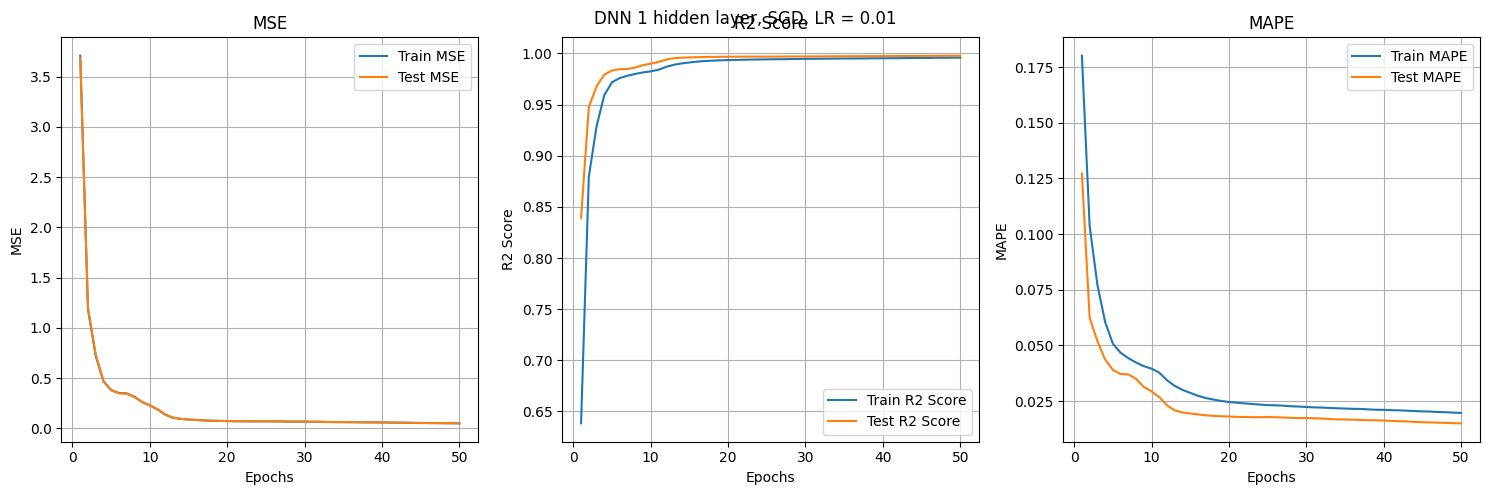

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 1 hidden layer, SGD, LR = 0.001
Epoch 1
MSE Train: 5.9124, R2 Train: 0.4678, MAPE Train: 0.2043
MSE Test: 5.9088, R2 Test: 0.7424, MAPE Test: 0.1548
Epoch 2
MSE Train: 5.8678, R2 Train: 0.7427, MAPE Train: 0.1555
MSE Test: 5.8693, R2 Test: 0.7441, MAPE Test: 0.1534
Epoch 3
MSE Train: 5.7182, R2 Train: 0.7465, MAPE Train: 0.1538
MSE Test: 5.7238, R2 Test: 0.7504, MAPE Test: 0.1512
Epoch 4
MSE Train: 5.3885, R2 Train: 0.7568, MAPE Train: 0.1501
MSE Test: 5.4031, R2 Test: 0.7644, MAPE Test: 0.1461
Epoch 5
MSE Train: 4.8697, R2 Train: 0.7750, MAPE Train: 0.1435
MSE Test: 4.8994, R2 Test: 0.7864, MAPE Test: 0.1384
Epoch 6
MSE Train: 3.6124, R2 Train: 0.8094, MAPE Train: 0.1304
MSE Test: 3.6488, R2 Test: 0.8408, MAPE Tes

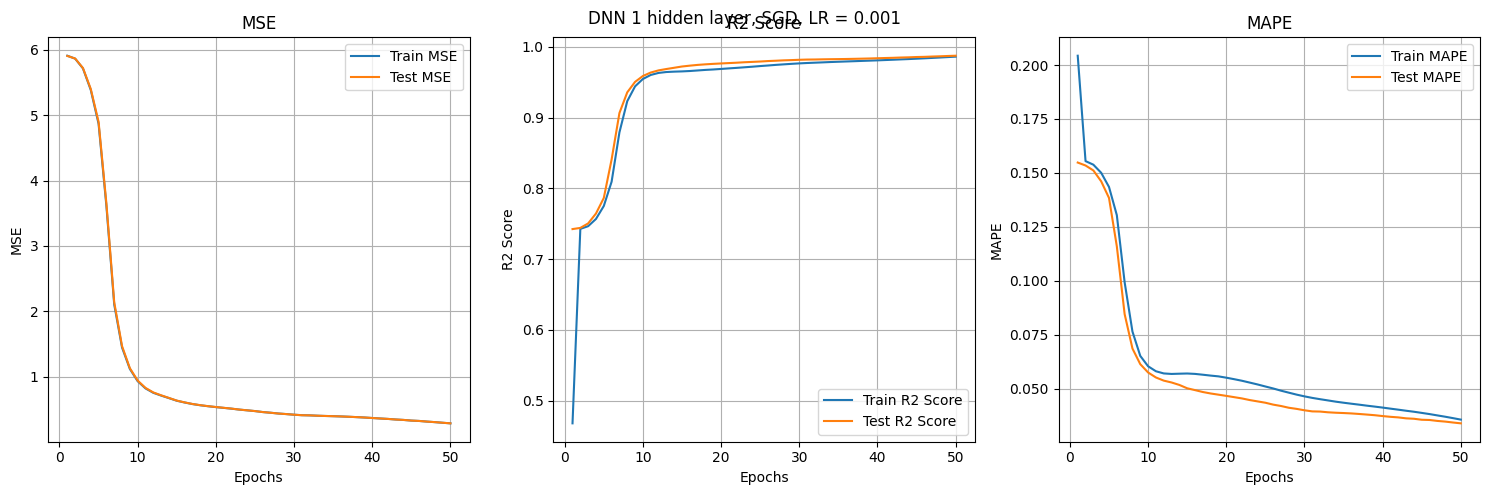

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 1 hidden layer, RMSProp, LR = 0.1
Epoch 1
MSE Train: 6.2075, R2 Train: -0.5753, MAPE Train: 0.2111
MSE Test: 6.1738, R2 Test: 0.7319, MAPE Test: 0.1613
Epoch 2
MSE Train: 6.9670, R2 Train: 0.6676, MAPE Train: 0.1825
MSE Test: 6.9051, R2 Test: 0.7008, MAPE Test: 0.1708
EarlyStopping counter: 1 out of 5
Epoch 3
MSE Train: 7.0770, R2 Train: 0.6706, MAPE Train: 0.1837
MSE Test: 7.0130, R2 Test: 0.6961, MAPE Test: 0.1722
EarlyStopping counter: 2 out of 5
Epoch 4
MSE Train: 7.0867, R2 Train: 0.6710, MAPE Train: 0.1838
MSE Test: 7.0223, R2 Test: 0.6958, MAPE Test: 0.1727
EarlyStopping counter: 3 out of 5
Epoch 5
MSE Train: 7.1121, R2 Train: 0.6711, MAPE Train: 0.1838
MSE Test: 7.0472, R2 Test: 0.6947, MAPE Test: 0.1731
Ea

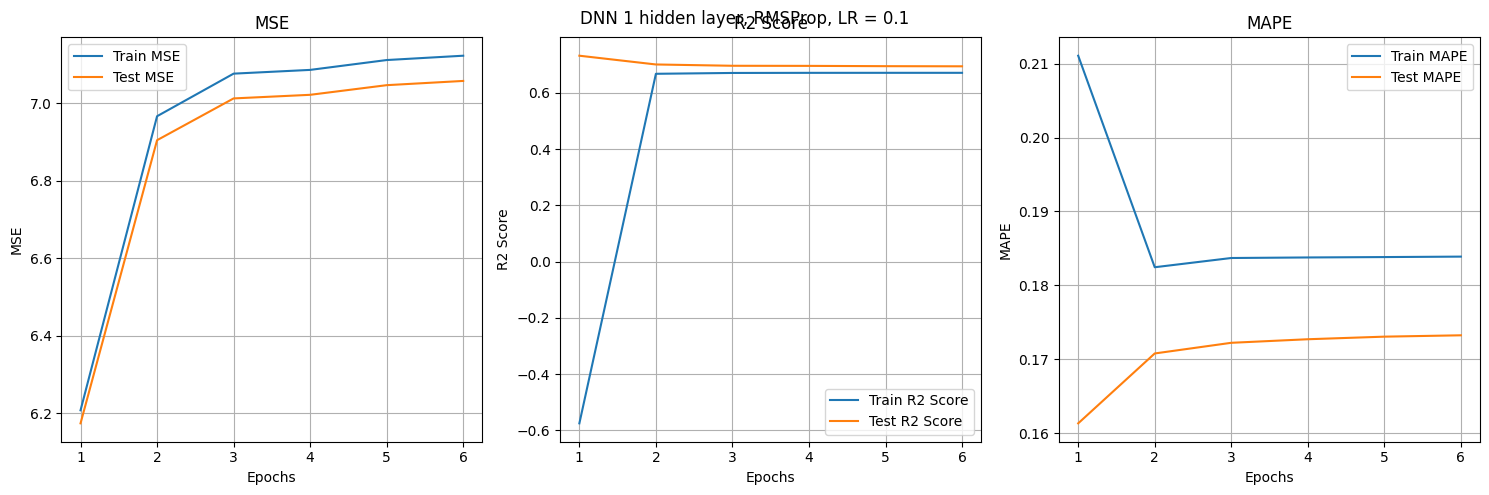

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 1 hidden layer, RMSProp, LR = 0.01
Epoch 1
MSE Train: 4.3994, R2 Train: 0.7596, MAPE Train: 0.1441
MSE Test: 4.3798, R2 Test: 0.8087, MAPE Test: 0.1256
Epoch 2
MSE Train: 4.4948, R2 Train: 0.8105, MAPE Train: 0.1266
MSE Test: 4.4708, R2 Test: 0.8048, MAPE Test: 0.1266
EarlyStopping counter: 1 out of 5
Epoch 3
MSE Train: 4.2931, R2 Train: 0.8208, MAPE Train: 0.1227
MSE Test: 4.2555, R2 Test: 0.8139, MAPE Test: 0.1310
Epoch 4
MSE Train: 1.9479, R2 Train: 0.8743, MAPE Train: 0.1071
MSE Test: 1.9147, R2 Test: 0.9160, MAPE Test: 0.0920
Epoch 5
MSE Train: 2.2149, R2 Train: 0.9114, MAPE Train: 0.0921
MSE Test: 2.1898, R2 Test: 0.9038, MAPE Test: 0.1032
EarlyStopping counter: 1 out of 5
Epoch 6
MSE Train: 1.7155, R2 Train:

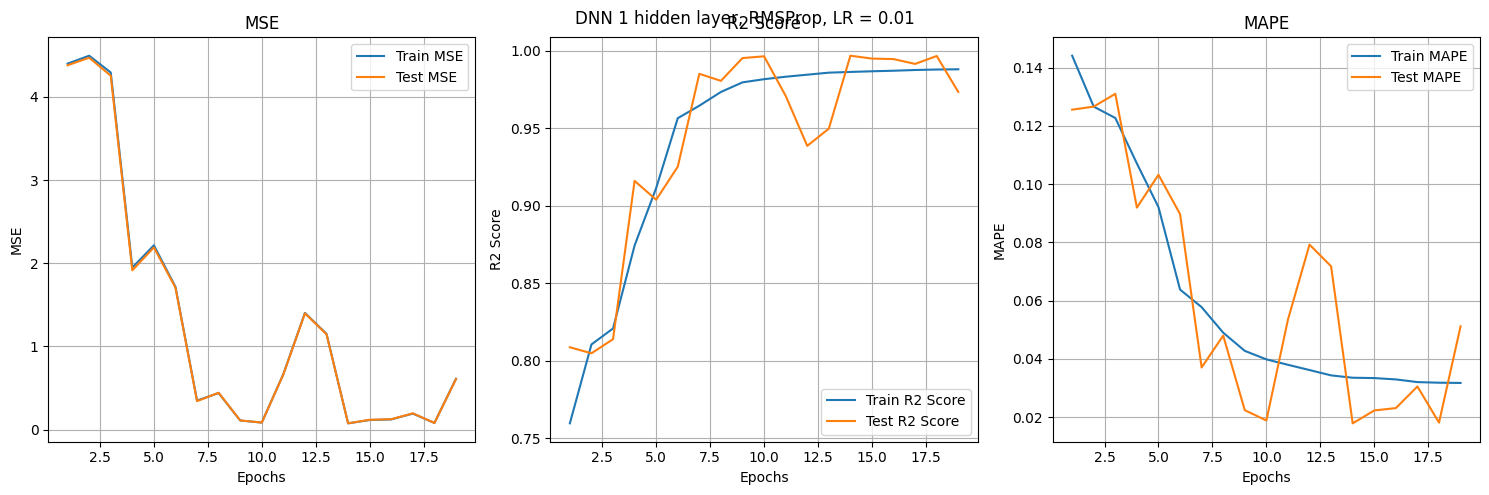

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 1 hidden layer, RMSProp, LR = 0.001
Epoch 1
MSE Train: 5.6753, R2 Train: 0.4300, MAPE Train: 0.2100
MSE Test: 5.6708, R2 Test: 0.7529, MAPE Test: 0.1513
Epoch 2
MSE Train: 5.0206, R2 Train: 0.7662, MAPE Train: 0.1482
MSE Test: 5.0168, R2 Test: 0.7812, MAPE Test: 0.1450
Epoch 3
MSE Train: 3.6133, R2 Train: 0.8076, MAPE Train: 0.1362
MSE Test: 3.6169, R2 Test: 0.8421, MAPE Test: 0.1256
Epoch 4
MSE Train: 2.7919, R2 Train: 0.8626, MAPE Train: 0.1174
MSE Test: 2.7904, R2 Test: 0.8781, MAPE Test: 0.1117
Epoch 5
MSE Train: 0.9224, R2 Train: 0.9180, MAPE Train: 0.0893
MSE Test: 0.9114, R2 Test: 0.9602, MAPE Test: 0.0629
Epoch 6
MSE Train: 0.5821, R2 Train: 0.9677, MAPE Train: 0.0569
MSE Test: 0.5730, R2 Test: 0.9749, MAPE

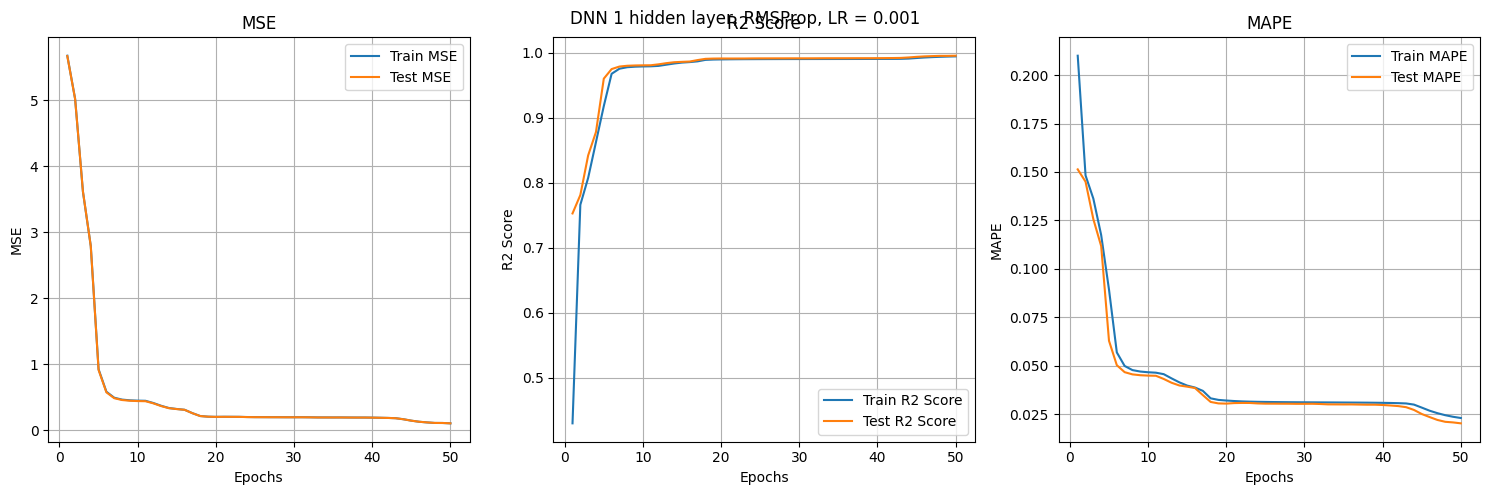

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 1 hidden layer, Adam, LR = 0.1
Epoch 1
MSE Train: 1.5414, R2 Train: 0.7539, MAPE Train: 0.1447
MSE Test: 1.5336, R2 Test: 0.9326, MAPE Test: 0.0739
Epoch 2
MSE Train: 0.2721, R2 Train: 0.9739, MAPE Train: 0.0477
MSE Test: 0.2703, R2 Test: 0.9882, MAPE Test: 0.0333
Epoch 3
MSE Train: 0.1982, R2 Train: 0.9838, MAPE Train: 0.0370
MSE Test: 0.1968, R2 Test: 0.9914, MAPE Test: 0.0280
Epoch 4
MSE Train: 0.1278, R2 Train: 0.9875, MAPE Train: 0.0327
MSE Test: 0.1273, R2 Test: 0.9944, MAPE Test: 0.0234
Epoch 5
MSE Train: 0.1506, R2 Train: 0.9903, MAPE Train: 0.0292
MSE Test: 0.1522, R2 Test: 0.9933, MAPE Test: 0.0254
EarlyStopping counter: 1 out of 5
Epoch 6
MSE Train: 0.2287, R2 Train: 0.9907, MAPE Train: 0.0285
MSE Test: 

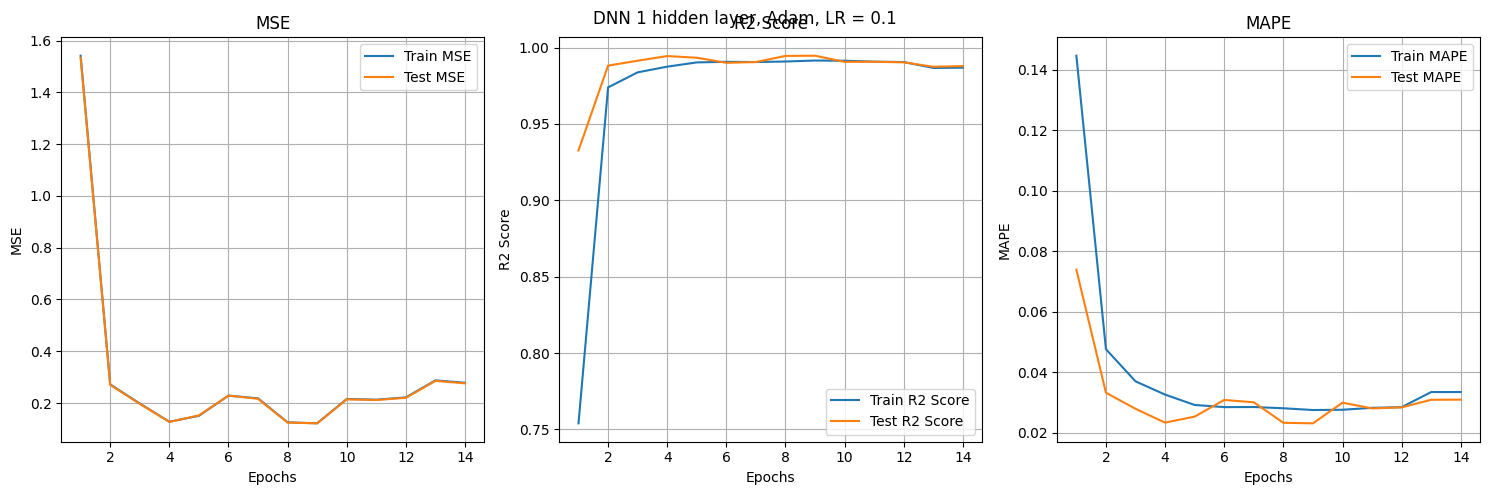

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 1 hidden layer, Adam, LR = 0.01
Epoch 1
MSE Train: 6.0877, R2 Train: 0.5945, MAPE Train: 0.1799
MSE Test: 6.1043, R2 Test: 0.7334, MAPE Test: 0.1583
Epoch 2
MSE Train: 6.0731, R2 Train: 0.7372, MAPE Train: 0.1569
MSE Test: 6.0883, R2 Test: 0.7341, MAPE Test: 0.1577
Epoch 3
MSE Train: 6.0645, R2 Train: 0.7374, MAPE Train: 0.1567
MSE Test: 6.0805, R2 Test: 0.7344, MAPE Test: 0.1576
Epoch 4
MSE Train: 2.1919, R2 Train: 0.8139, MAPE Train: 0.1246
MSE Test: 2.2076, R2 Test: 0.9034, MAPE Test: 0.0807
Epoch 5
MSE Train: 0.3162, R2 Train: 0.9592, MAPE Train: 0.0519
MSE Test: 0.3180, R2 Test: 0.9861, MAPE Test: 0.0353
Epoch 6
MSE Train: 0.2085, R2 Train: 0.9884, MAPE Train: 0.0332
MSE Test: 0.2098, R2 Test: 0.9908, MAPE Tes

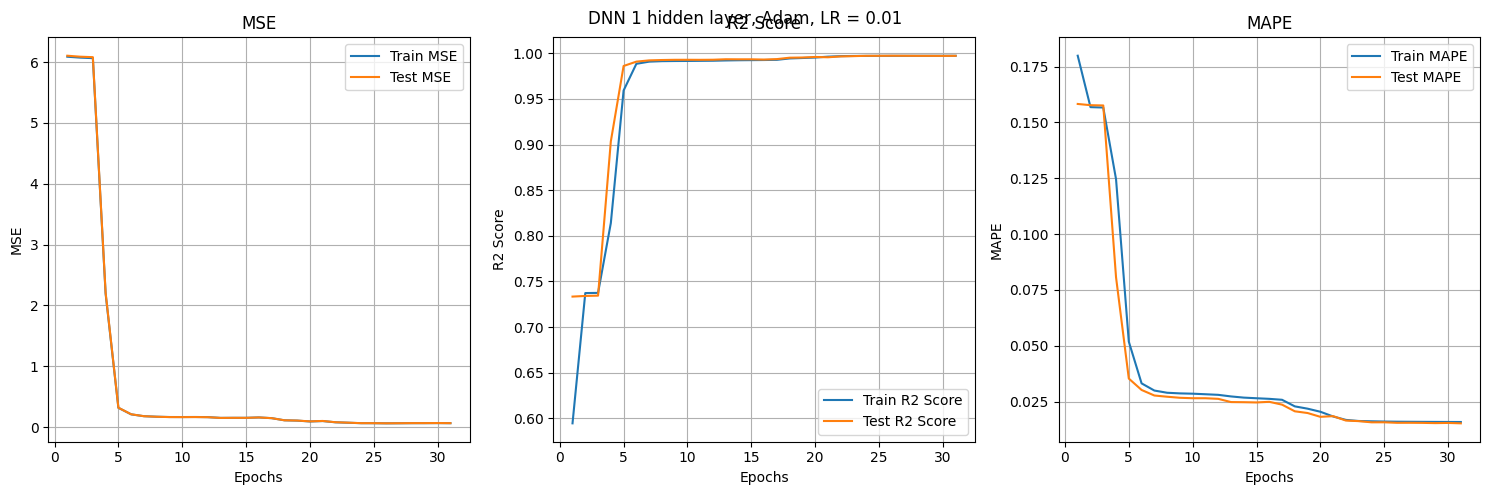

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 1 hidden layer, Adam, LR = 0.001
Epoch 1
MSE Train: 5.7929, R2 Train: 0.0976, MAPE Train: 0.2352
MSE Test: 5.7910, R2 Test: 0.7476, MAPE Test: 0.1513
Epoch 2
MSE Train: 5.1727, R2 Train: 0.7600, MAPE Train: 0.1489
MSE Test: 5.1897, R2 Test: 0.7736, MAPE Test: 0.1429
Epoch 3
MSE Train: 4.3943, R2 Train: 0.7888, MAPE Train: 0.1391
MSE Test: 4.4199, R2 Test: 0.8072, MAPE Test: 0.1268
Epoch 4
MSE Train: 3.7155, R2 Train: 0.8269, MAPE Train: 0.1251
MSE Test: 3.7604, R2 Test: 0.8358, MAPE Test: 0.1176
Epoch 5
MSE Train: 3.3928, R2 Train: 0.8461, MAPE Train: 0.1195
MSE Test: 3.4296, R2 Test: 0.8501, MAPE Test: 0.1145
Epoch 6
MSE Train: 3.1648, R2 Train: 0.8577, MAPE Train: 0.1170
MSE Test: 3.1909, R2 Test: 0.8605, MAPE Te

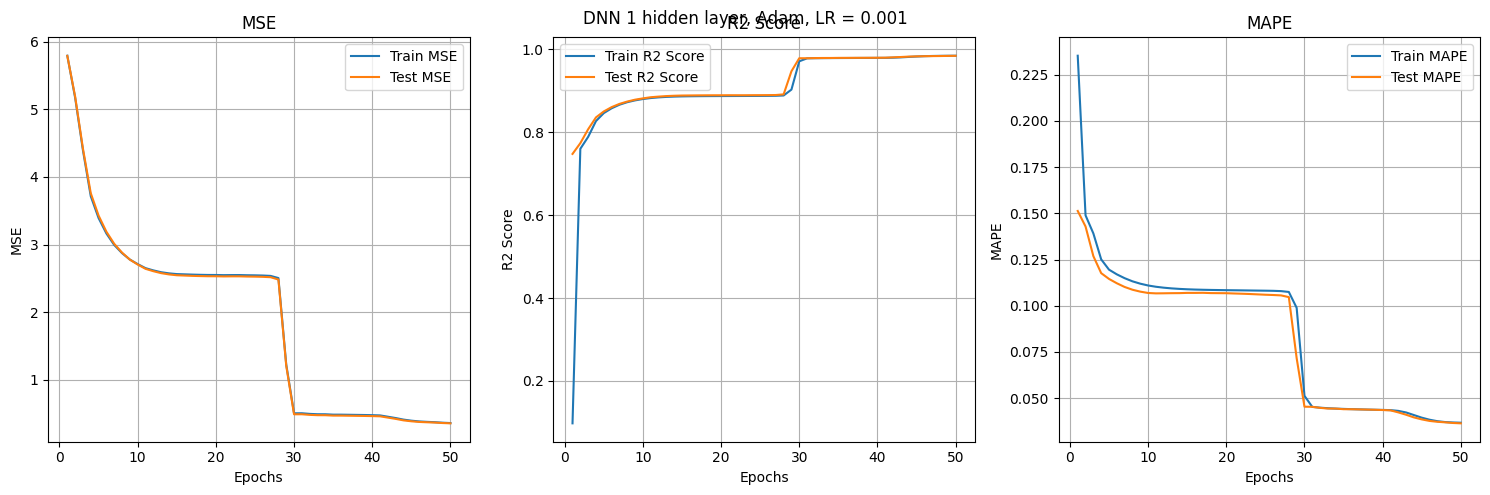

In [ ]:
hidden_layers = [16]
start(X_train, y_train, X_test, y_test, hidden_layers, 10, 1, 1)

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 5 hidden layer, SGD, LR = 0.1
Epoch 1
MSE Train: 23.8566, R2 Train: -0.0371, MAPE Train: 0.3799
MSE Test: 23.7957, R2 Test: -0.0174, MAPE Test: 0.3719
Epoch 2
MSE Train: 23.8566, R2 Train: -0.0188, MAPE Train: 0.3788
MSE Test: 23.7957, R2 Test: -0.0174, MAPE Test: 0.3719
EarlyStopping counter: 1 out of 5
Epoch 3
MSE Train: 23.8566, R2 Train: -0.0188, MAPE Train: 0.3788
MSE Test: 23.7957, R2 Test: -0.0174, MAPE Tes

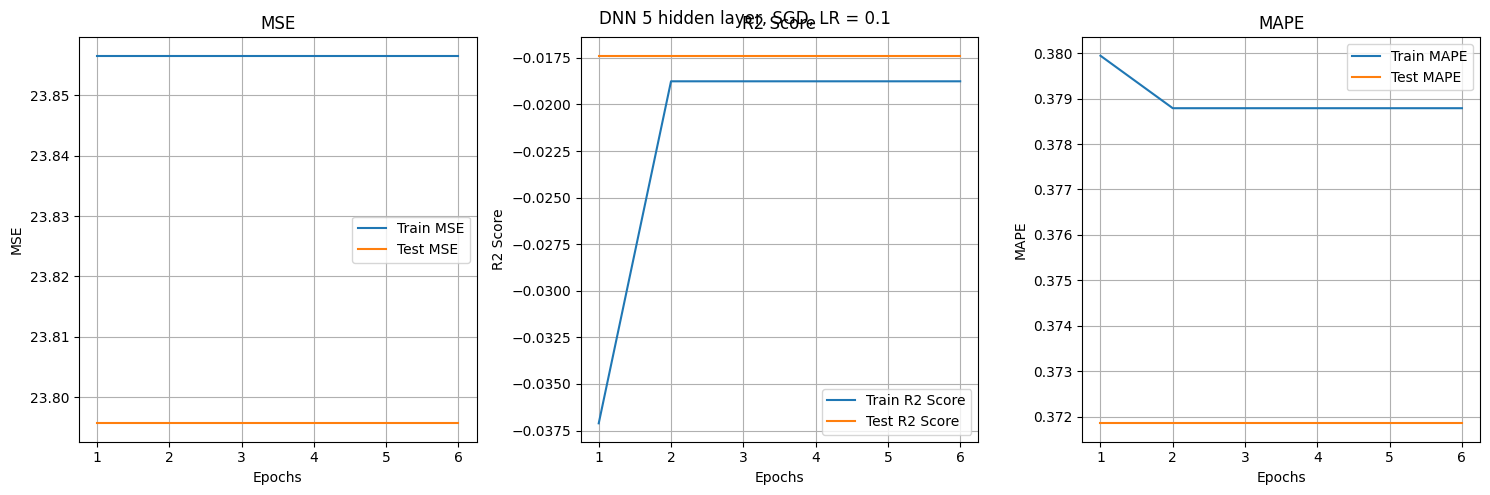

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 5 hidden layer, SGD, LR = 0.01
Epoch 1
MSE Train: 5.7920, R2 Train: 0.6356, MAPE Train: 0.1811
MSE Test: 5.7728, R2 Test: 0.7512, MAPE Test: 0.1431
Epoch 2
MSE Train: 2.6157, R2 Train: 0.9151, MAPE Train: 0.0930
MSE Test: 2.6127, R2 Test: 0.8861, MAPE Test: 0.0982
Epoch 3
MSE Train: 0.4583, R2 Train: 0.9575, MAPE Train: 0.0665
MSE Test: 0.4596, R2 Test: 0.9799, MAPE Test: 0.0493
Epoch 4
MSE Train: 0.2587, R2 Train

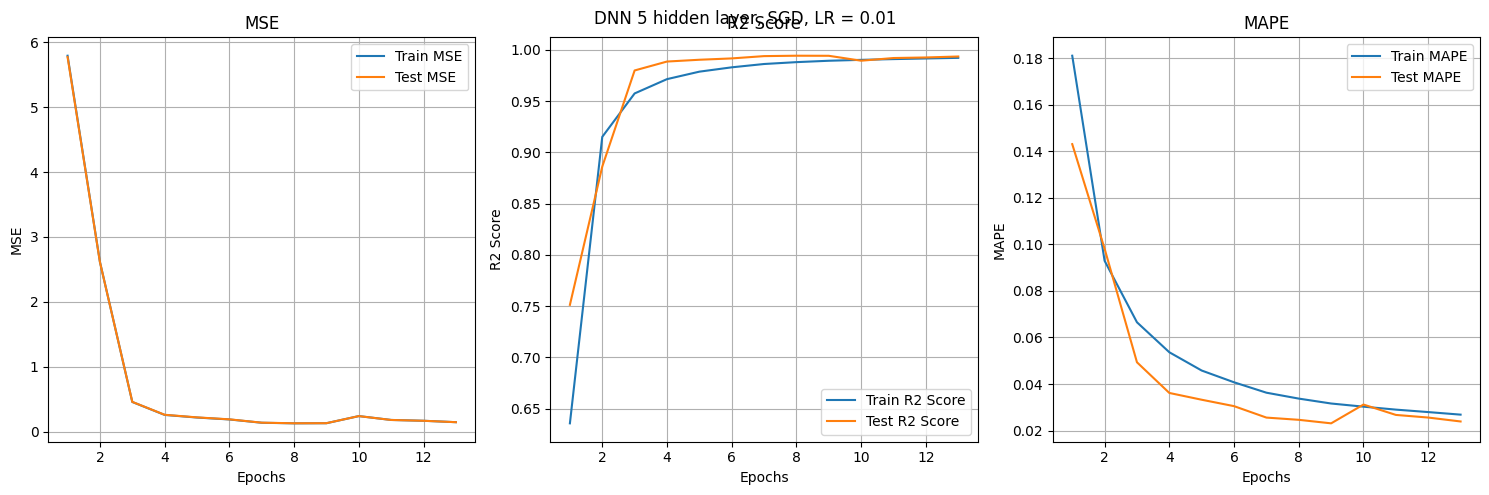

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 5 hidden layer, SGD, LR = 0.001
Epoch 1
MSE Train: 5.2187, R2 Train: 0.4113, MAPE Train: 0.2048
MSE Test: 5.2137, R2 Test: 0.7733, MAPE Test: 0.1430
Epoch 2
MSE Train: 1.9116, R2 Train: 0.8156, MAPE Train: 0.1316
MSE Test: 1.9285, R2 Test: 0.9160, MAPE Test: 0.0890
Epoch 3
MSE Train: 1.2416, R2 Train: 0.9008, MAPE Train: 0.0963
MSE Test: 1.2493, R2 Test: 0.9455, MAPE Test: 0.0679
Epoch 4
MSE Train: 0.9510, R2 Trai

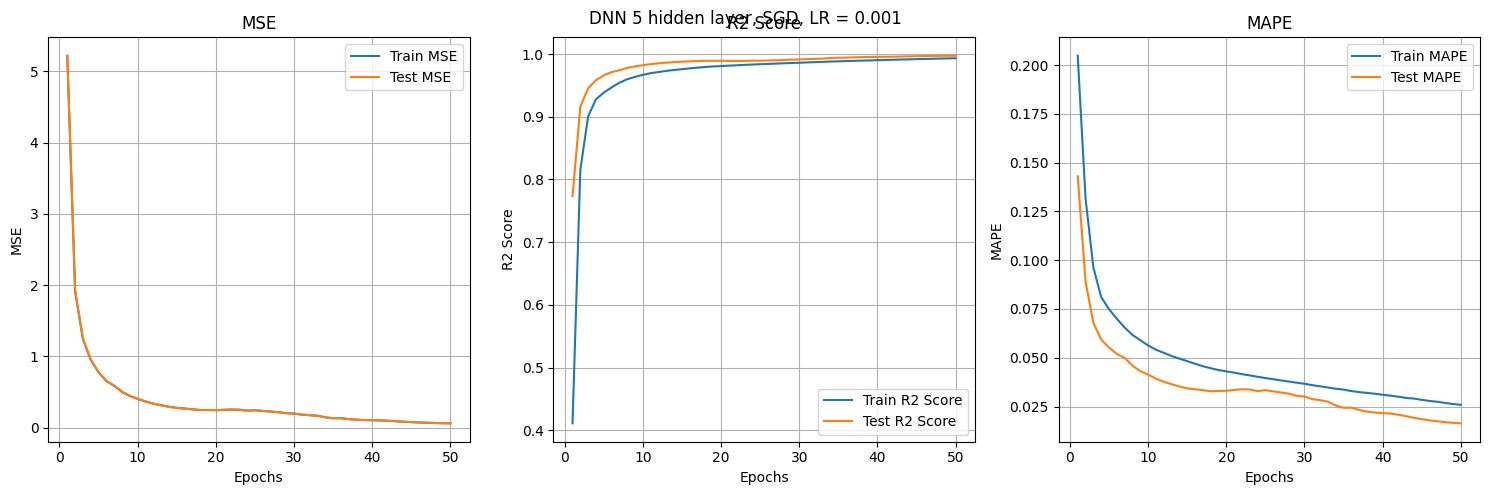

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 5 hidden layer, RMSProp, LR = 0.1
Epoch 1
MSE Train: 23.0966, R2 Train: -77203.9424, MAPE Train: 2.6542
MSE Test: 23.0588, R2 Test: 0.0141, MAPE Test: 0.3706
Epoch 2
MSE Train: 23.8349, R2 Train: -0.0506, MAPE Train: 0.3806
MSE Test: 23.7760, R2 Test: -0.0165, MAPE Test: 0.3743
EarlyStopping counter: 1 out of 5
Epoch 3
MSE Train: 23.8557, R2 Train: -0.0214, MAPE Train: 0.3787
MSE Test: 23.7948, R2 Test: -0.0173, M

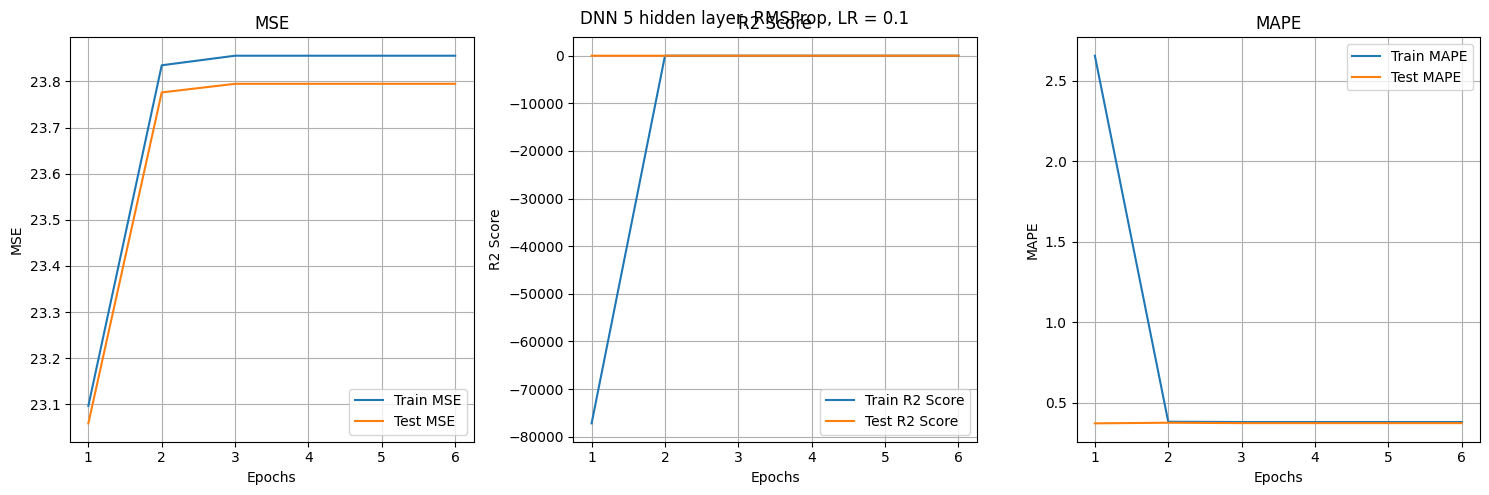

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 5 hidden layer, RMSProp, LR = 0.01
Epoch 1
MSE Train: 1.7249, R2 Train: 0.6528, MAPE Train: 0.1688
MSE Test: 1.7541, R2 Test: 0.9236, MAPE Test: 0.0849
Epoch 2
MSE Train: 0.9422, R2 Train: 0.8992, MAPE Train: 0.0951
MSE Test: 0.9441, R2 Test: 0.9586, MAPE Test: 0.0709
Epoch 3
MSE Train: 0.6050, R2 Train: 0.9358, MAPE Train: 0.0766
MSE Test: 0.6071, R2 Test: 0.9734, MAPE Test: 0.0574
Epoch 4
MSE Train: 0.5787, R2 T

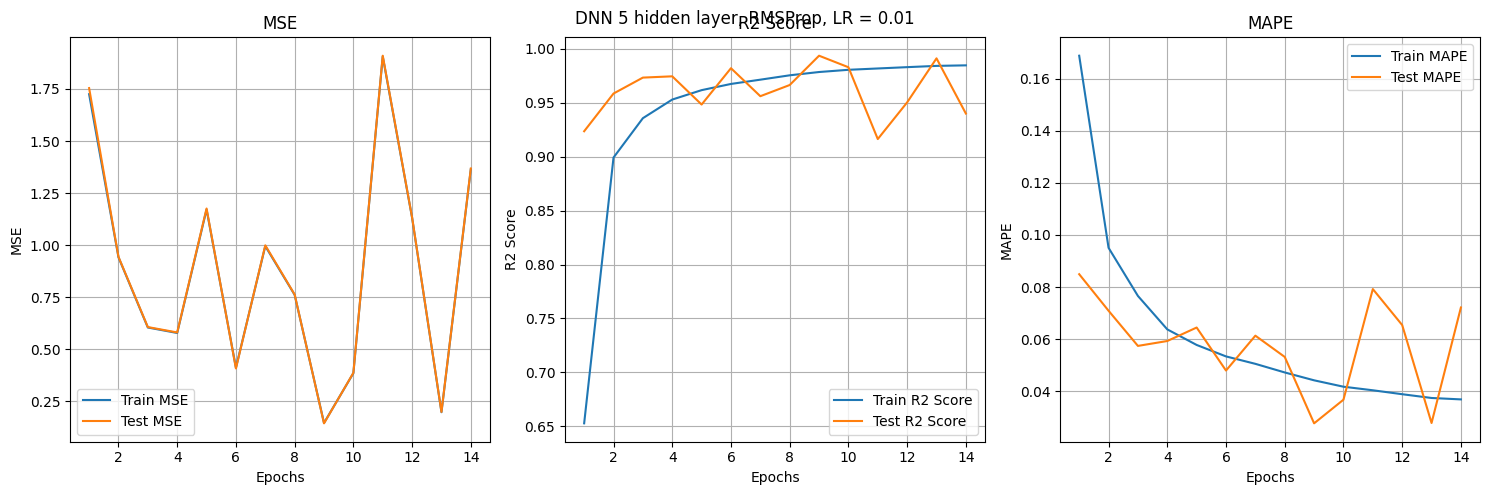

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 5 hidden layer, RMSProp, LR = 0.001
Epoch 1
MSE Train: 5.2160, R2 Train: 0.5959, MAPE Train: 0.1858
MSE Test: 5.2179, R2 Test: 0.7724, MAPE Test: 0.1422
Epoch 2
MSE Train: 2.9101, R2 Train: 0.8250, MAPE Train: 0.1191
MSE Test: 2.9399, R2 Test: 0.8716, MAPE Test: 0.0944
Epoch 3
MSE Train: 1.5153, R2 Train: 0.8937, MAPE Train: 0.0857
MSE Test: 1.5325, R2 Test: 0.9330, MAPE Test: 0.0662
Epoch 4
MSE Train: 0.4661, R2 

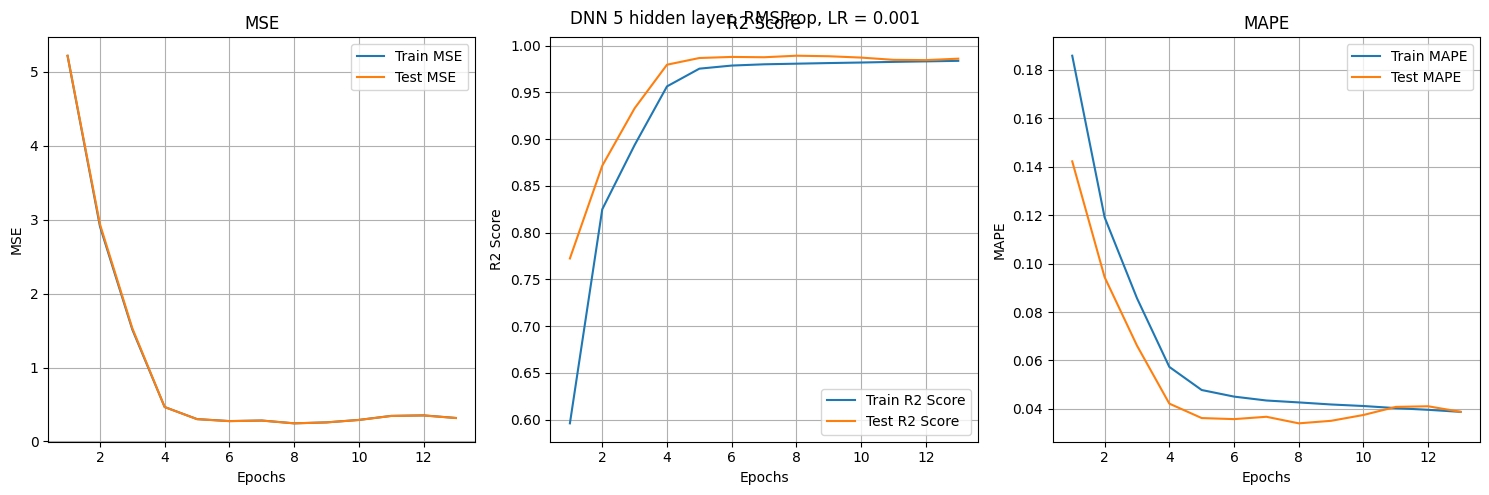

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 5 hidden layer, Adam, LR = 0.1
Epoch 1
MSE Train: 24.4218, R2 Train: -0.2196, MAPE Train: 0.3897
MSE Test: 24.3479, R2 Test: -0.0417, MAPE Test: 0.3588
Epoch 2
MSE Train: 24.5317, R2 Train: -0.0271, MAPE Train: 0.3795
MSE Test: 24.4564, R2 Test: -0.0465, MAPE Test: 0.3576
EarlyStopping counter: 1 out of 5
Epoch 3
MSE Train: 24.0974, R2 Train: -0.0249, MAPE Train: 0.3793
MSE Test: 24.0289, R2 Test: -0.0277, MAPE Te

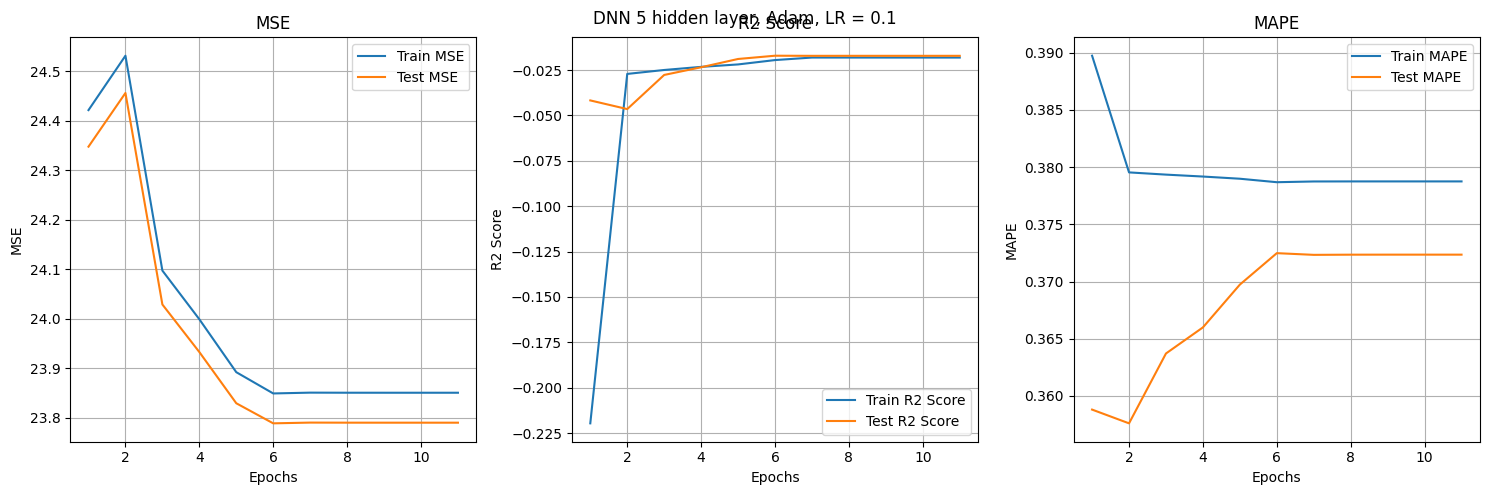

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 5 hidden layer, Adam, LR = 0.01
Epoch 1
MSE Train: 2.9361, R2 Train: 0.7063, MAPE Train: 0.1461
MSE Test: 2.9620, R2 Test: 0.8705, MAPE Test: 0.0961
Epoch 2
MSE Train: 0.8309, R2 Train: 0.8964, MAPE Train: 0.0874
MSE Test: 0.8292, R2 Test: 0.9636, MAPE Test: 0.0566
Epoch 3
MSE Train: 0.2135, R2 Train: 0.9826, MAPE Train: 0.0386
MSE Test: 0.2154, R2 Test: 0.9906, MAPE Test: 0.0275
Epoch 4
MSE Train: 0.1910, R2 Trai

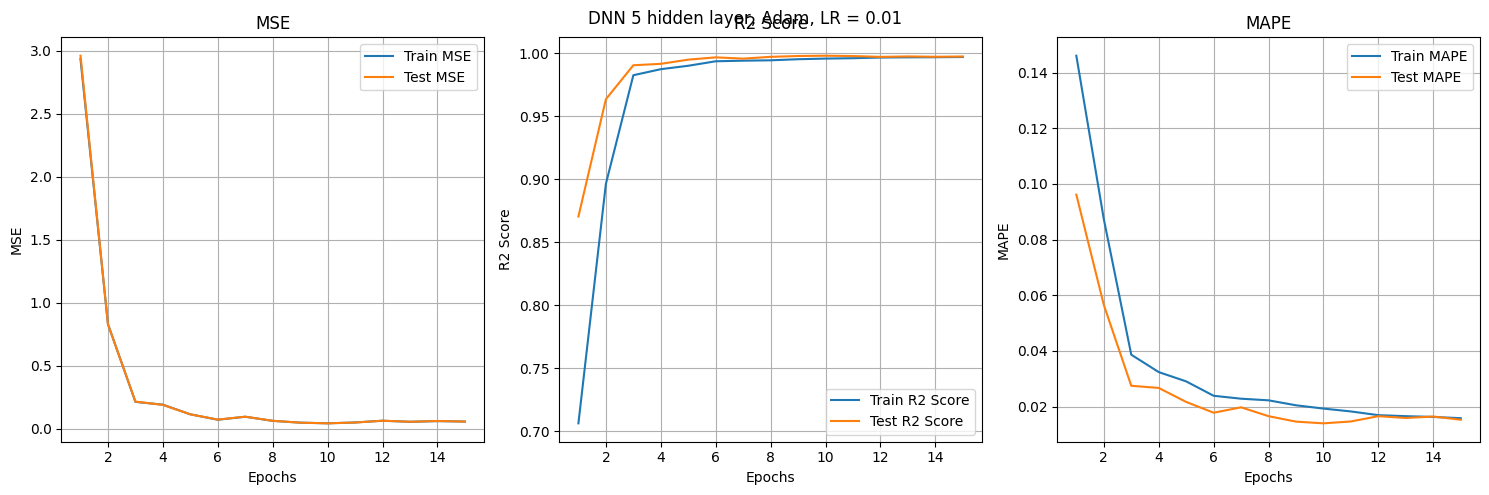

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)
DNN 5 hidden layer, Adam, LR = 0.001
Epoch 1
MSE Train: 6.0289, R2 Train: 0.1642, MAPE Train: 0.2300
MSE Test: 6.0133, R2 Test: 0.7380, MAPE Test: 0.1526
Epoch 2
MSE Train: 5.9660, R2 Train: 0.7393, MAPE Train: 0.1564
MSE Test: 5.9569, R2 Test: 0.7404, MAPE Test: 0.1523
Epoch 3
MSE Train: 5.9633, R2 Train: 0.7393, MAPE Train: 0.1562
MSE Test: 5.9545, R2 Test: 0.7405, MAPE Test: 0.1522
Epoch 4
MSE Train: 5.9656, R2 Tra

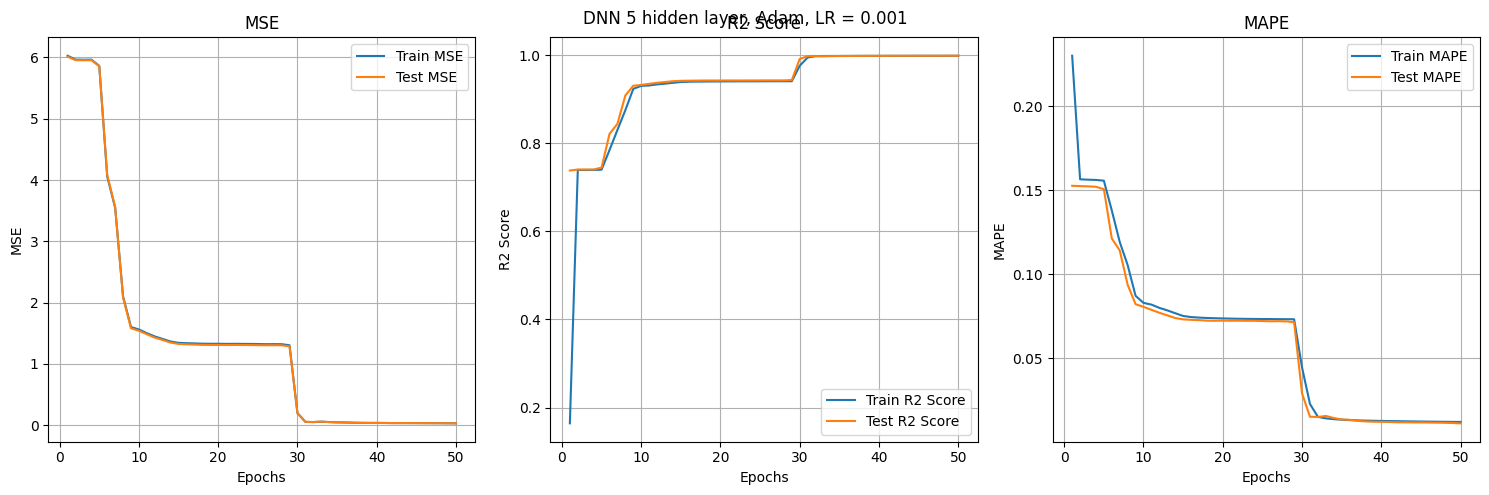

In [ ]:
hidden_layers = [16,16,16,16,16]
start(X_train, y_train, X_test, y_test, hidden_layers, 10, 1, 5)

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=16, bias=True)
    (15): ReLU()
    (16): Linear(in_features=16, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=16, bias=True)
    (19): ReLU()
    (20): Linear(in_features=16, out_features=16, bias=True)
    (21): ReLU()
    (22): Linear(in_features=16, out_features=16, bias=True)
    (23): ReLU()
    (24): Linear(in

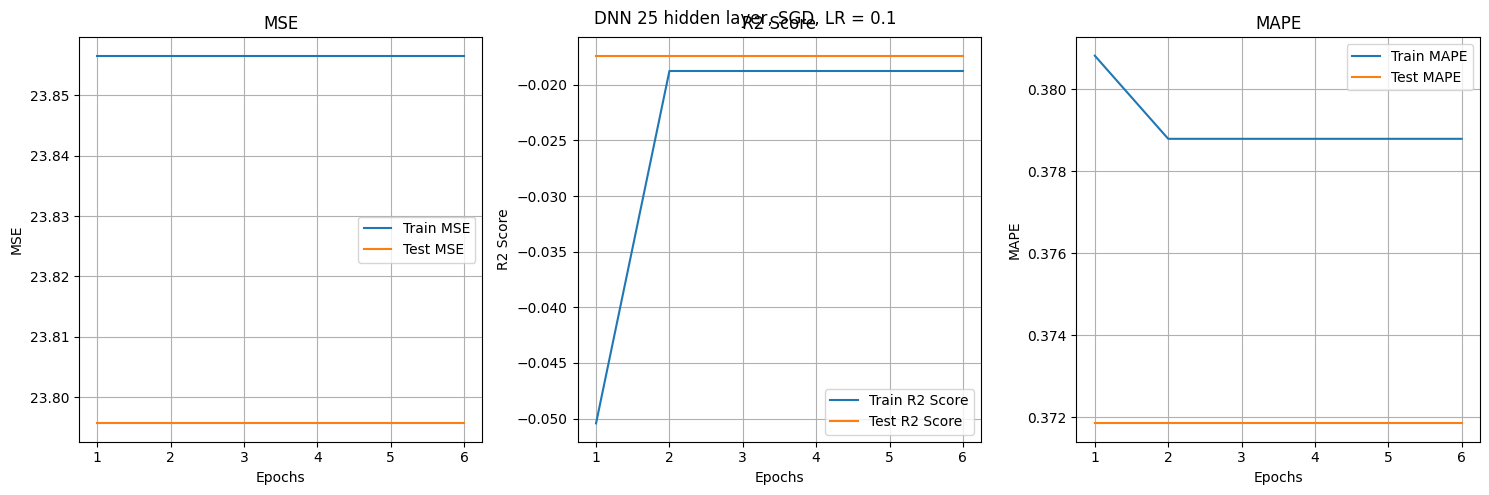

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=16, bias=True)
    (15): ReLU()
    (16): Linear(in_features=16, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=16, bias=True)
    (19): ReLU()
    (20): Linear(in_features=16, out_features=16, bias=True)
    (21): ReLU()
    (22): Linear(in_features=16, out_features=16, bias=True)
    (23): ReLU()
    (24): Linear(in

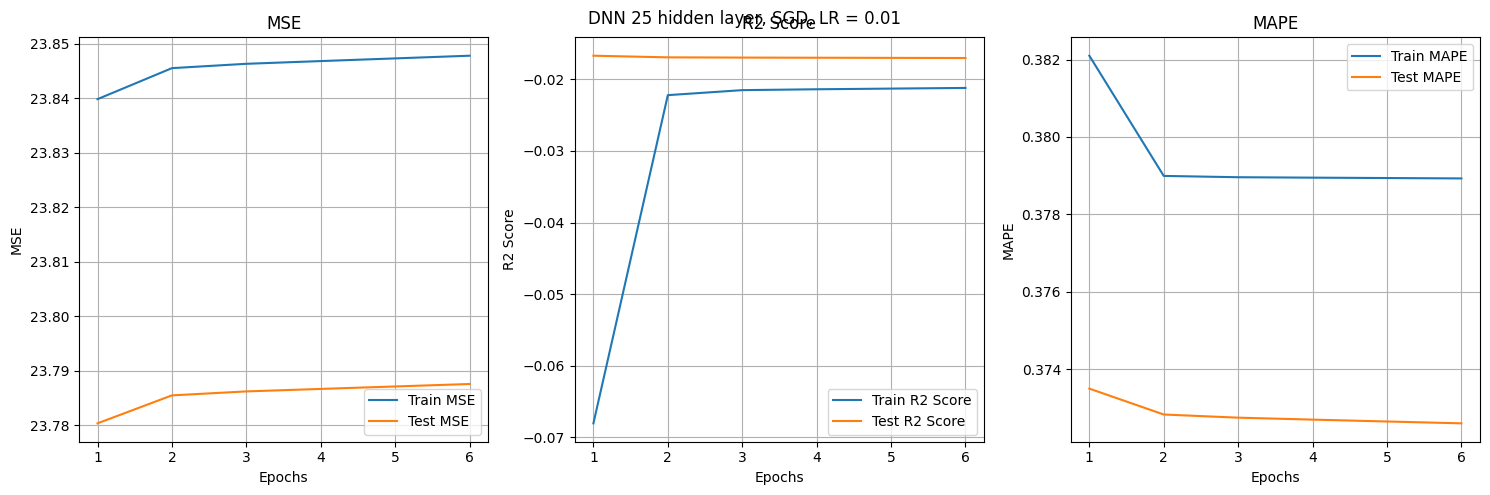

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=16, bias=True)
    (15): ReLU()
    (16): Linear(in_features=16, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=16, bias=True)
    (19): ReLU()
    (20): Linear(in_features=16, out_features=16, bias=True)
    (21): ReLU()
    (22): Linear(in_features=16, out_features=16, bias=True)
    (23): ReLU()
    (24): Linear(in

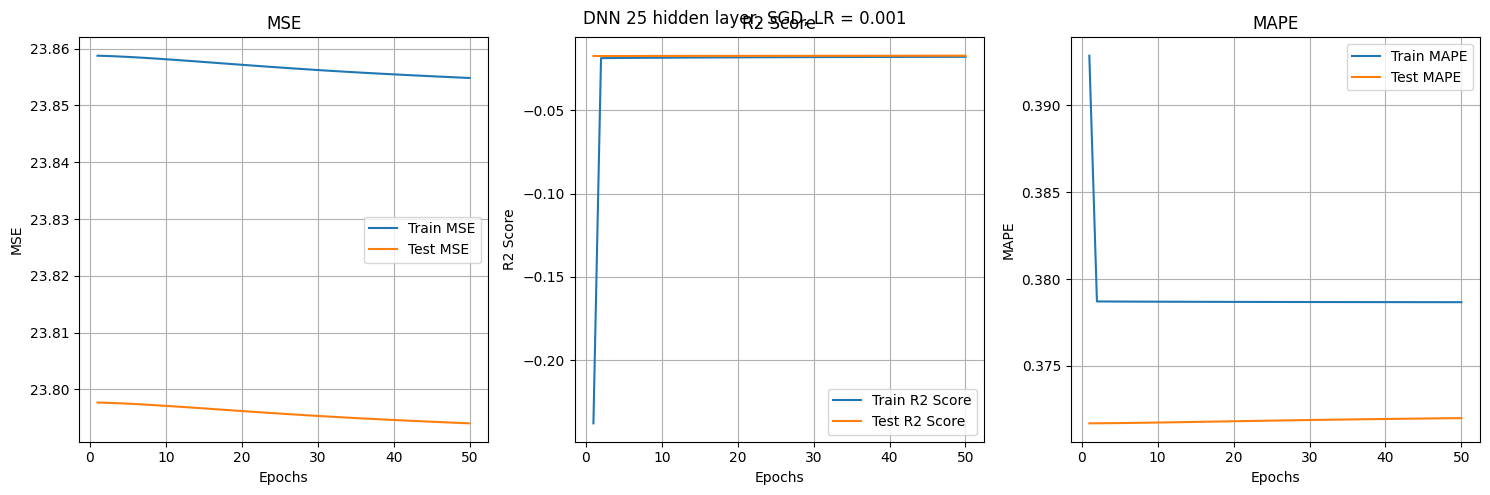

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=16, bias=True)
    (15): ReLU()
    (16): Linear(in_features=16, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=16, bias=True)
    (19): ReLU()
    (20): Linear(in_features=16, out_features=16, bias=True)
    (21): ReLU()
    (22): Linear(in_features=16, out_features=16, bias=True)
    (23): ReLU()
    (24): Linear(in

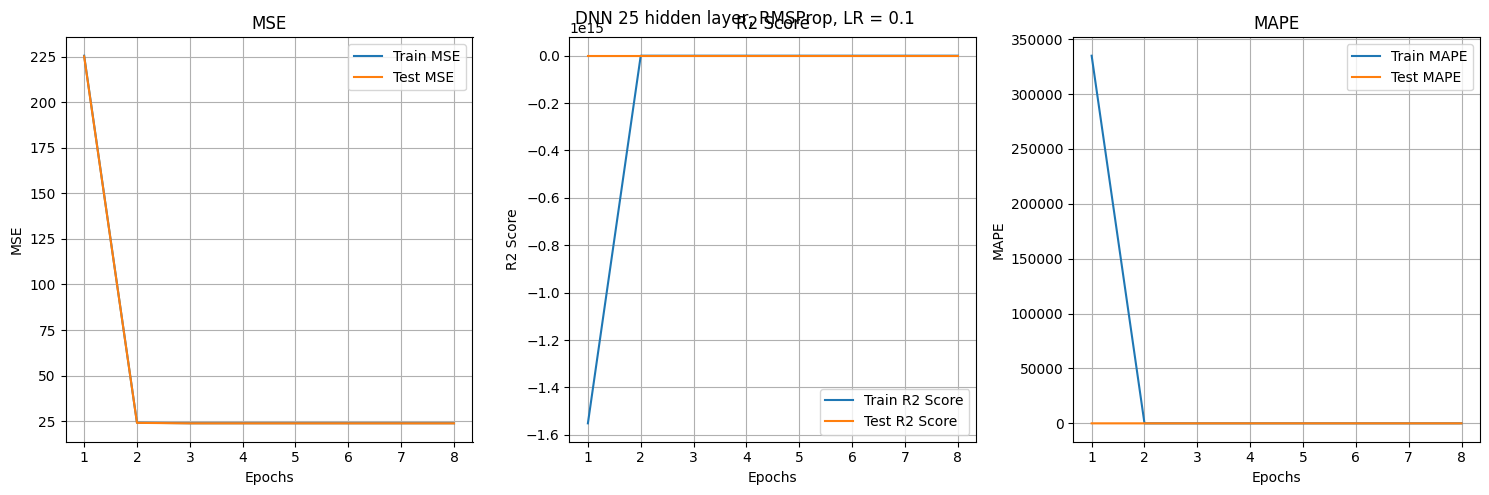

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=16, bias=True)
    (15): ReLU()
    (16): Linear(in_features=16, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=16, bias=True)
    (19): ReLU()
    (20): Linear(in_features=16, out_features=16, bias=True)
    (21): ReLU()
    (22): Linear(in_features=16, out_features=16, bias=True)
    (23): ReLU()
    (24): Linear(in

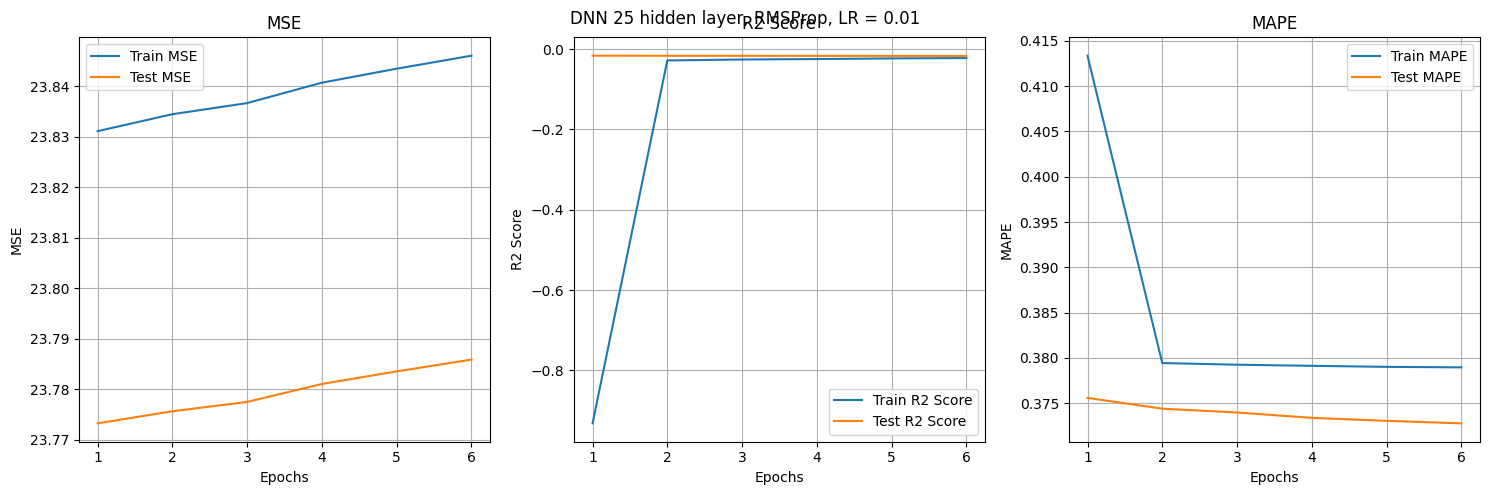

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=16, bias=True)
    (15): ReLU()
    (16): Linear(in_features=16, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=16, bias=True)
    (19): ReLU()
    (20): Linear(in_features=16, out_features=16, bias=True)
    (21): ReLU()
    (22): Linear(in_features=16, out_features=16, bias=True)
    (23): ReLU()
    (24): Linear(in

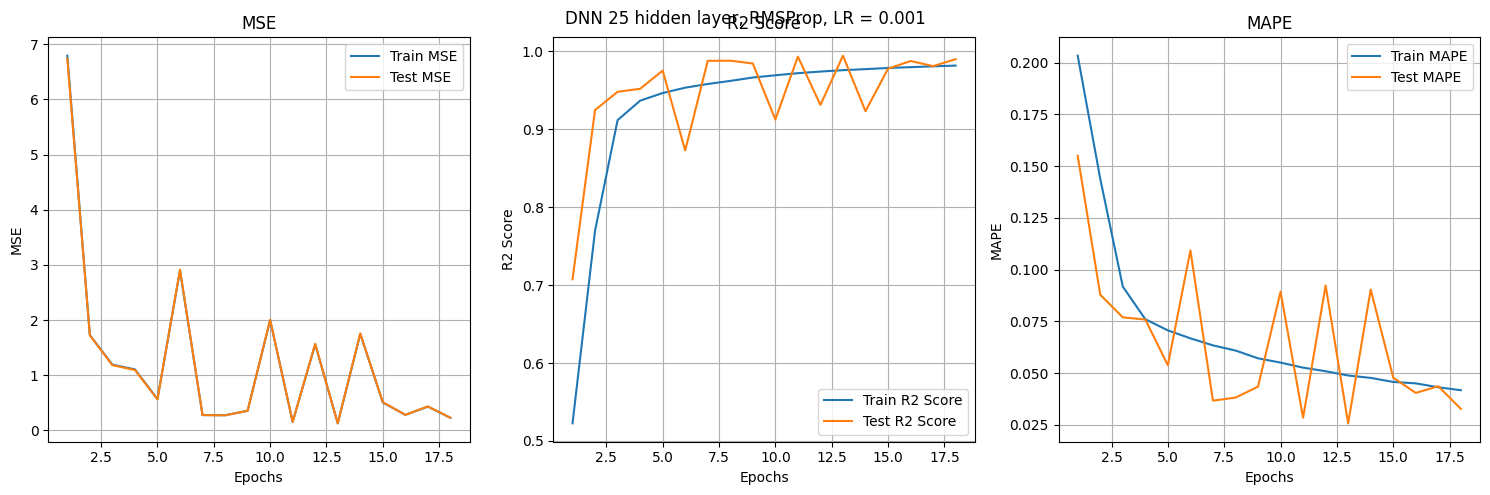

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=16, bias=True)
    (15): ReLU()
    (16): Linear(in_features=16, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=16, bias=True)
    (19): ReLU()
    (20): Linear(in_features=16, out_features=16, bias=True)
    (21): ReLU()
    (22): Linear(in_features=16, out_features=16, bias=True)
    (23): ReLU()
    (24): Linear(in

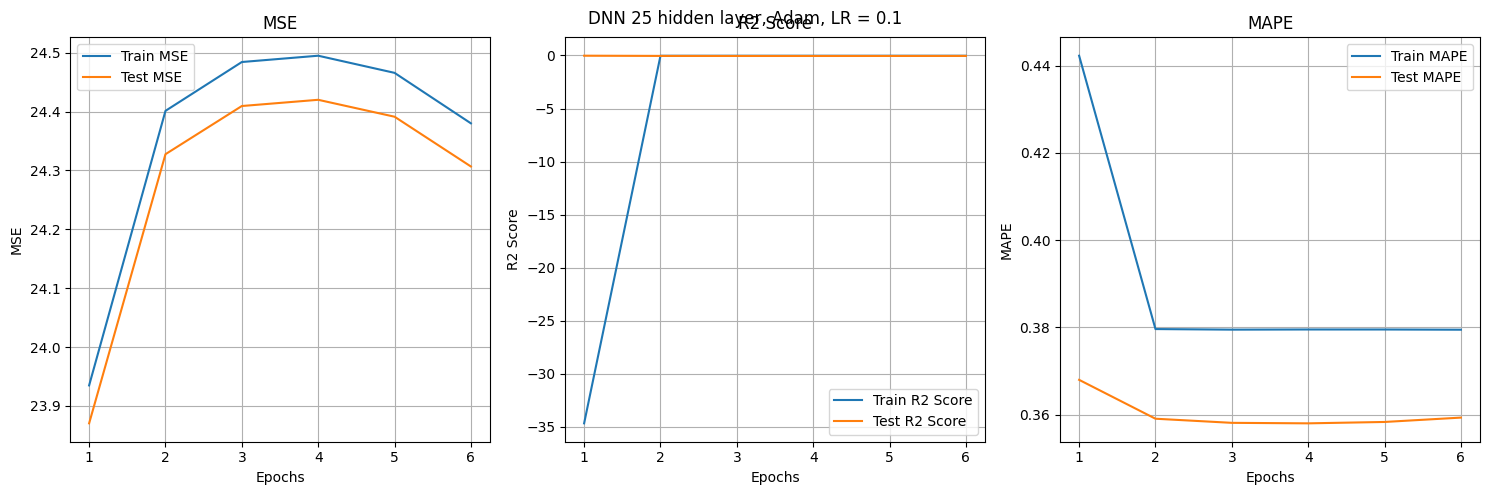

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=16, bias=True)
    (15): ReLU()
    (16): Linear(in_features=16, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=16, bias=True)
    (19): ReLU()
    (20): Linear(in_features=16, out_features=16, bias=True)
    (21): ReLU()
    (22): Linear(in_features=16, out_features=16, bias=True)
    (23): ReLU()
    (24): Linear(in

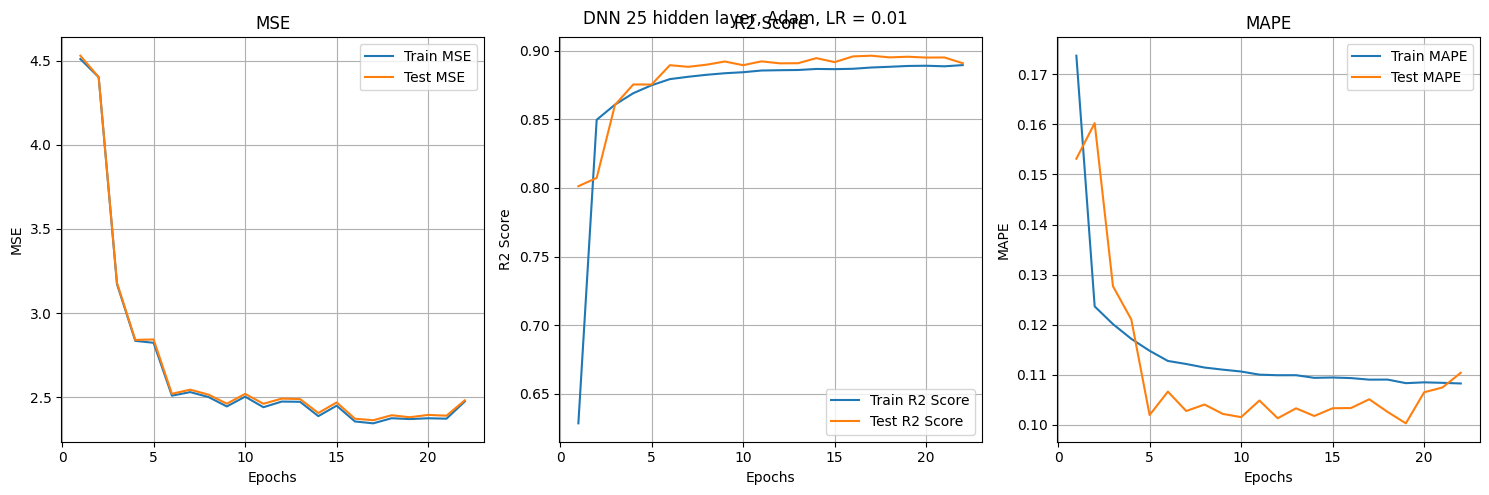

DenseNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=16, bias=True)
    (15): ReLU()
    (16): Linear(in_features=16, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=16, bias=True)
    (19): ReLU()
    (20): Linear(in_features=16, out_features=16, bias=True)
    (21): ReLU()
    (22): Linear(in_features=16, out_features=16, bias=True)
    (23): ReLU()
    (24): Linear(in

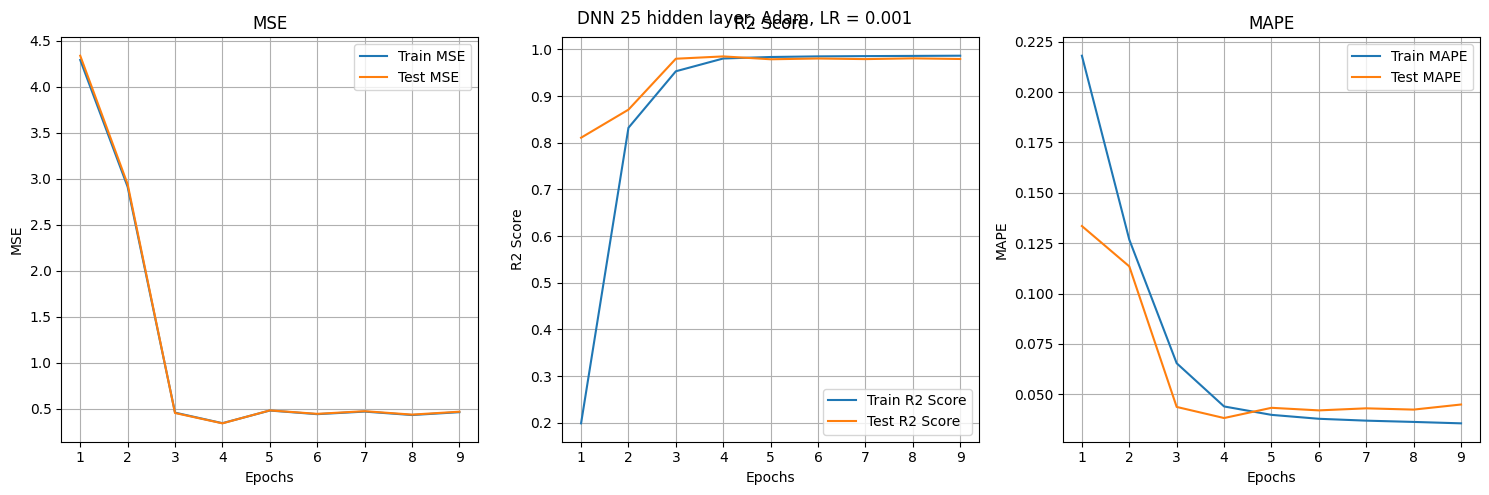

In [ ]:
hidden_layers = [16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16]
start(X_train, y_train, X_test, y_test, hidden_layers, 10, 1, 25)

1. What models and combinations of hyper-parameters worked best? Why?
2. Influence of optimizer?
3. Influence of learning rate?
4. Influence of DNN architecture (number of layers)?
5. Influence of data distribution (linear or non-linear?)

MSE 0.0288 це найкраще значення, якого вдалось досягнути, також ця модель мала r2 score близки до 1 (0.9987) та MAPE 0.0111 на тестових даних, що вважається дуже хорошим показником. Але були і не вдалі моделі з MSE близько 23.78.

1. Найкращою комбінацією була модель з 5 прихованих шарів, Adam оптимайзером та 0.001 learning rate. Також хочу зазначити що моделі з 5 шарами в більшості показували дуже хороші результати. 5 шарів дають змогу оптимально вивчати більш складні характеристики та закономірності в даних. Adam оптимізатор добре відпрацьовує, оскільки поєднує в собі переваги адаптивних методів градієнтного спуску.

2. Оптимізатор визначає, як параметри мережі, такі як ваги, мають змінюватися під час навчання з метою мінімізації функції втрат. Adam оптимізатор добре працює на широкому спектрі завдань, оскільки поєднує в собі переваги адаптивних методів градієнтного спуску. Adam обчислює адаптивні швидкості навчання для кожної ваги мережі, роблячи її менш чутливою до вибору гіперпараметрів. SGD — це простий і популярний оптимізатор, який оновлює вагові коефіцієнти в напрямку від’ємного градієнта функції втрат. Однак він може застрягти в локальних мінімумах, і швидкість навчання потрібно налаштовувати ретельно. RMSProp також адаптивно регулює швидкість навчання для кожної ваги на основі історичних градієнтів. Він використовує експоненційне згладжування квадрату градієнтів, щоб підтримувати окремі швидкості навчання для кожного параметра. RMSProp особливо корисний для роботи з нестаціонарними даними, де розподіл градієнтів може змінюватися з часом. Отже, кожен з оптимізатор може бути корисним та давати хороші результати в залежності від датасету та гіперпараметрів мережі.

3. Швидкість навчання — це гіперпараметр, який визначає розмір кроку, з яким оптимізатор оновлює вагові коефіцієнти нейронної мережі під час навчання. Погано вибрана швидкість навчання може погіршити роботу вашої моделі (якщо ви визначаєте великий крок), а також може подовжити навчання. (якщо вибрати малий крок). Однак занадто велика швидкість навчання може призвести до того, що модель не зможе "відійти" від неправильно вибраних початкових ваг. Важливо вибрати відповідну швидкість навчання на основі конкретного завдання та набору даних.

4. Кількість рівнів у DNN впливає на пропускну здатність, яка стосується здатності мережі представляти складні функції. Збільшення кількості рівнів може збільшити пропускну здатність мережі, дозволяючи їй вивчати більш складні характеристики та закономірності в даних. Однак забагато шарів може призвести до перенавчання, коли модель добре працює на навчальних даних, але погано на нових ​​даних. Також при великій кількості шарів може виника проблема vanishing gradients (градієнти стають дуже малими і не змінюють значення при зворотньому поширенні) або gradient explosion (градієнти можуть стати надто великими, що призведе до чисельних проблем при оновленні ваг).

5. У випадку лінійного розподілу даних, можна очікувати, що модель, така як лінійна регресія або проста одношарова мережа, зможе ефективно навчитися. У випадку не лінійного розподілу даних, якщо взяти приклади зі складними залежностями між ознаками просто одношарова модель не завжди може ефективно навчитись та дати хороші результаи, потрібна більш складна модель для ефективного навчання. Але з кожним додатковим шаром збільшується складність обчислень.